# Fine-tuning SpeechT5 for multilingual TTS

In [1]:
!pip install datasets soundfile speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 21.7 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-w1pcudhd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-w1pcudhd
  Resolved https://github.com/huggingface/transformers.git to commit b0f0c61899019d316db17a493023828aa44db06d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.8 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.46.0.dev0-py3-none-any.whl size=10034048 sha256=809fd418784f54e8bb08a59763fb2da16dbafff7980b8f5c8526112fcc9a6011
  Stored in directory: /tmp/pip-ephem-wheel-cache-naj5gwbn/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      S

In [3]:
!pip install --upgrade accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [4]:
!nvidia-smi

Wed Oct 23 22:31:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In case no GPU is found, from the menu choose **Runtime > Change runtime type** and set **Hardware accelerator** to **GPU**. Then restart the runtime to activate the GPU.

In [5]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [6]:
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("srija616/GC_marathi_large")

# Define a function to filter only intent_class 0, 4, and 7
def filter_classes(example):
    return example['intent_class'] in [0, 4, 7]

# Apply the filter on the dataset
fdataset = dataset.filter(filter_classes)

# Display a sample to verify the filtering
print(fdataset)

# If you want to save the filtered dataset locally
fdataset.save_to_disk("filtered_dataset")


README.md:   0%|          | 0.00/370 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1568 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1568 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'intent_class', 'transcription'],
        num_rows: 666
    })
})


Saving the dataset (0/1 shards):   0%|          | 0/666 [00:00<?, ? examples/s]

It's important to set the sampling rate of the audio data to 16 kHz, which is what SpeechT5 expects.

In [7]:
from datasets import load_dataset, Audio
fdataset['train']= fdataset['train'].cast_column("audio", Audio(sampling_rate=16000))

Let's quickly check how many examples are in this dataset.

In [ ]:
len(fdataset)

1

In [8]:
print(len(fdataset['train']))

666


That should be sufficient for fine-tuning. We'll have a closer look at these examples soon.

In [9]:
tokenizer = processor.tokenizer

In [10]:
def extract_all_chars(batch):
    all_text = " ".join(batch["transcription"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = fdataset['train'].map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=fdataset['train'].column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/666 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer with Devanagari support
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")

# Function to extract all unique Devanagari characters from the dataset
def extract_all_chars(batch):
    all_text = " ".join(batch["transcription"])  # Assuming 'transcription' contains the text
    vocab = list(set(all_text))  # Get all unique characters
    return {"vocab": [vocab], "all_text": [all_text]}

# Apply the function to the dataset (fdataset being your dataset variable)
vocabs = fdataset['train'].map(
    extract_all_chars,
    batched=True,
    batch_size=-1,  # Process the entire dataset in one go
    keep_in_memory=True,
    remove_columns=fdataset['train'].column_names,  # Keep only vocab and text
)

# Extract the vocabulary from the dataset
dataset_vocab = set(vocabs["vocab"][0])

# Extract the tokenizer vocabulary and filter it for Devanagari characters
tokenizer_vocab = tokenizer.get_vocab()
devanagari_vocab = {token: idx for token, idx in tokenizer_vocab.items() if any('\u0900' <= char <= '\u097F' for char in token)}

# Check the characters in the dataset that are missing in the tokenizer's vocabulary
missing_chars = dataset_vocab - set(devanagari_vocab.keys())
print(f"Missing characters in tokenizer: {missing_chars}")


Map:   0%|          | 0/666 [00:00<?, ? examples/s]

Missing characters in tokenizer: {',', '-', ' ', '.', '?', '\u200d', '!'}


In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer with Devanagari support
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")

# Check for Devanagari characters in the vocabulary
tokenizer_vocab = tokenizer.get_vocab()
devanagari_vocab = {token: idx for token, idx in tokenizer_vocab.items() if any('\u0900' <= char <= '\u097F' for char in token)}
print(f"Devanagari characters in IndicBERT tokenizer: {devanagari_vocab}")


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Devanagari characters in IndicBERT tokenizer: {'▁बारीक': 25524, '▁किसी': 364, 'ंसक': 188452, '▁रेट': 18573, '▁ट्वि': 138262, 'क्षर': 137630, 'ोली': 16208, '▁ब्रेक': 18309, '▁वैश्य': 113984, '▁मीटर': 5768, '▁अतिथियों': 102668, 'दड़': 79675, 'हिर': 94592, '▁कृपया': 28996, 'टिस्ट': 159647, '▁क्षेत्ररक्षण': 168893, '▁सर्जनशील': 98523, '▁जलसंपदा': 89905, 'दु': 33147, '▁अम्बा': 184152, '▁दाढ': 126411, '▁वोडाफोन': 64421, '▁सुन्न': 145469, 'पालिका': 171371, '▁लिपिक': 102414, '▁बाइ': 57982, '▁थी': 223, '▁पदार्थों': 39357, '▁प्रकरण': 7715, '▁एकमत': 114896, '▁मजिस्ट्रेट': 46096, '▁घ्यायला': 47371, '▁जिम्मेवारी': 158906, 'सम्पर्क': 179840, 'सुद': 178855, 'ार्थ': 15776, '▁हिज': 89922, '▁नमन': 80758, '▁पणजी': 34333, 'अर्चना': 186924, '▁पूर्ति': 57941, 'डून': 48039, 'लेक्ट': 129517, '▁बाजूला': 15044, '▁पदव्युत्तर': 151691, 'चिंचवड': 191921, '▁पहली': 1792, '▁रिका': 144994, '▁नावावर': 49319, 'सीएच': 138608, '▁महिन्यांपूर्वी': 77638, '▁गुना': 22469, '▁किला': 104844, '▁ऑडिट': 50072, '▁अनावर': 173538, 'पा

Now we have two sets of characters, one with the vocabulary from the dataset and one with the vocabulary from the tokenizer. By taking the difference between these sets, we find the characters that are in the dataset but not in the tokenizer.

In [12]:
dataset_vocab - tokenizer_vocab


{' ',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ऱ',
 'ल',
 'ळ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 'ौ',
 '्',
 'ॲ',
 '\u200d'}

Next, we will define a function to map these characters to valid tokens and then run it on the dataset. No need to handle space, that's already replaced by `▁` in the tokenizer.

In [14]:
replacements = [
    (' ', ' '),  # Space
    ('ँ', 'n'),  # Anusvara with nasalization
    ('ं', 'n'),  # Anusvara
    ('ः', 'h'),  # Visarga
    ('अ', 'a'),  # Short a
    ('आ', 'aa'),  # Long a
    ('इ', 'i'),  # Short i
    ('ई', 'ee'),  # Long i
    ('उ', 'u'),  # Short u
    ('ऊ', 'oo'),  # Long u
    ('ए', 'e'),  # Long e
    ('ऐ', 'ai'),  # ai
    ('ऑ', 'o'),  # Short o
    ('ओ', 'o'),  # Long o
    ('औ', 'au'),  # au
    ('क', 'k'),  # ka
    ('ख', 'kh'),  # kha
    ('ग', 'g'),  # ga
    ('घ', 'gh'),  # gha
    ('च', 'ch'),  # cha
    ('छ', 'chh'),  # chha
    ('ज', 'j'),  # ja
    ('झ', 'jh'),  # jha
    ('ञ', 'ny'),  # nya
    ('ट', 't'),  # Retroflex t
    ('ठ', 'th'),  # Retroflex th
    ('ड', 'd'),  # Retroflex d
    ('ढ', 'dh'),  # Retroflex dh
    ('ण', 'n'),  # Retroflex n
    ('त', 't'),  # Dental t
    ('थ', 'th'),  # Dental th
    ('द', 'd'),  # Dental d
    ('ध', 'dh'),  # Dental dh
    ('न', 'n'),  # Dental n
    ('प', 'p'),  # pa
    ('फ', 'ph'),  # pha
    ('ब', 'b'),  # ba
    ('भ', 'bh'),  # bha
    ('म', 'm'),  # ma
    ('य', 'y'),  # ya
    ('र', 'r'),  # ra
    ('ऱ', 'r'),  # Retroflex ra
    ('ल', 'l'),  # la
    ('ळ', 'l'),  # Retroflex l
    ('व', 'v'),  # va/wa
    ('श', 'sh'),  # sha
    ('ष', 'sh'),  # Retroflex sha
    ('स', 's'),  # sa
    ('ह', 'h'),  # ha
    ('ा', 'aa'),  # Long a matra
    ('ि', 'i'),  # Short i matra
    ('ी', 'ee'),  # Long i matra
    ('ु', 'u'),  # Short u matra
    ('ू', 'oo'),  # Long u matra
    ('ृ', 'ru'),  # ru (vowel sign)
    ('ॅ', 'e'),  # Short e matra
    ('े', 'e'),  # Long e matra
    ('ै', 'ai'),  # ai matra
    ('ॉ', 'o'),  # Short o matra
    ('ो', 'o'),  # Long o matra
    ('ौ', 'au'),  # au matra
    ('्', ''),  # Halant
    ('ॲ', 'a'),  # Special short a
    ('\u200d', '')  # Zero-width joiner
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["transcription"] = inputs["transcription"].replace(src, dst)
    return inputs

fdataset = fdataset.map(cleanup_text)


Map:   0%|          | 0/666 [00:00<?, ? examples/s]

And how many examples?

In [ ]:
len(fdataset['train'])

666

## Speaker embeddings

In [15]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

<ipython-input-15-9f95de381175>:3: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

## Preparing the dataset

In [16]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["transcription"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Let's verify the processing is correct by looking at a single example:

In [17]:
processed_example = prepare_dataset(fdataset['train'][0])

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [18]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [19]:
tokenizer.decode(processed_example["input_ids"])

'amraapoor gaavaalaa ruperee pddyaavr olkh nirmaan kroon dilee tee sdaashiv amraapoor yaanneech</s>'

Speaker embeddings should be a 512-element vector:

In [20]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

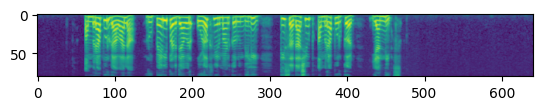

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [22]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [23]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

In [24]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)

That all looks and sounds good! We can now process the entire dataset. This will take between 5 and 10 minutes.

In [25]:
fdataset = fdataset.map(
    prepare_dataset, remove_columns=fdataset['train'].column_names,
)

Map:   0%|          | 0/666 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/9973 [00:00<?, ? examples/s]

How many examples are left?

In [ ]:
len(dataset)

8259

## Train/test split

Create a basic train/test split. For our purposes, it's OK if the same speaker is part of both sets.

In [26]:
fdataset["train"] = fdataset["train"].train_test_split(test_size=0.1)

What does the dataset look like now?

In [27]:
fdataset

DatasetDict({
    train: DatasetDict({
        train: Dataset({
            features: ['input_ids', 'labels', 'speaker_embeddings'],
            num_rows: 599
        })
        test: Dataset({
            features: ['input_ids', 'labels', 'speaker_embeddings'],
            num_rows: 67
        })
    })
})

In [28]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [29]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

Let's test the data collator.

In [30]:
features = [
    fdataset['train']["train"][0],
    fdataset['train']["train"][1],
    fdataset['train']["train"][20],
]

batch = data_collator(features)

In [31]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 92]),
 'attention_mask': torch.Size([3, 92]),
 'labels': torch.Size([3, 454, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

Looks good!

## Training

In [32]:
from huggingface_hub import notebook_login

notebook_login()

The `use_cache=True` option is incompatible with gradient checkpointing. Disable it for training, otherwise it keeps complaining about it.

In [33]:
model.config.use_cache = False

In [34]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_marathi_train2",  # change to a repo name of your choice
    per_device_train_batch_size=32,
    gradient_accumulation_steps=1,
    learning_rate=3e-6,
    warmup_steps=100,
    max_steps=1000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=100,
    eval_steps=100,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Create the trainer object using the model, dataset, and data collator.

In [35]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=fdataset['train']["train"],
    eval_dataset=fdataset['train']["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

<ipython-input-35-d3f4e0385b76>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [36]:
trainer.train()

Step,Training Loss,Validation Loss
100,0.818500,0.736611
200,0.771800,0.671436
300,0.676100,0.568741
400,0.666300,0.554704
500,0.591000,0.543066
600,0.596900,0.532272
700,0.602100,0.530223
800,0.579100,0.525840
900,0.572100,0.523505
1000,0.572100,0.523419


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2816: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=1000, training_loss=0.6726117277145386, metrics={'train_runtime': 1883.2382, 'train_samples_per_second': 16.992, 'train_steps_per_second': 0.531, 'total_flos': 4078218277302048.0, 'train_loss': 0.6726117277145386, 'epoch': 52.63157894736842})

If we do one more `push_to_hub()` after training we can get a nice model card built for us. We simply have to set the appropriate keyword arguments (kwargs). You can change these values to match your dataset, language and model name accordingly:

In [37]:
kwargs = {
    "dataset_tags": "srija616/GC_marathi_large",
    "dataset": "GC_marathi_large",  # a 'pretty' name for the training dataset
    "language": "mr",
    "model_name": "SpeechT5 TTS marathi train2",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",

}

The training results can now be uploaded to the Hub. To do so, execute the `push_to_hub` command:

In [ ]:
trainer.push_to_hub(**kwargs)

CommitInfo(commit_url='https://huggingface.co/pranavdaware/speecht5_tts_marathi_train1/commit/34a564a1ed846e8c030e928e23d55715decd8df1', commit_message='End of training', commit_description='', oid='34a564a1ed846e8c030e928e23d55715decd8df1', pr_url=None, pr_revision=None, pr_num=None)